In [1]:
df = spark.sql("SELECT country,GPI,Year FROM GPI.GPI")
display(df)

StatementMeta(, df52ad9f-75d5-43f5-b9f1-2f0eb4b0d2b1, 3, Finished, Available)

SynapseWidget(Synapse.DataFrame, 8010f161-7304-41dd-8b8d-474890fb12eb)

In [2]:
import pandas as pd
data = df.toPandas()
display(data)

StatementMeta(, df52ad9f-75d5-43f5-b9f1-2f0eb4b0d2b1, 4, Finished, Available)

/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:604: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  [(c, t) for (_, c), t in zip(pdf_slice.iteritems(), arrow_types)]
/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:425: UserWarning: createDataFrame attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Expected bytes, got a 'decimal.Decimal' object
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)
/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


SynapseWidget(Synapse.DataFrame, f4c933c6-b8d3-49b3-bdb2-e8c0507b9b48)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

StatementMeta(, df52ad9f-75d5-43f5-b9f1-2f0eb4b0d2b1, 5, Finished, Available)

In [4]:
print(data.isnull().sum())

StatementMeta(, df52ad9f-75d5-43f5-b9f1-2f0eb4b0d2b1, 6, Finished, Available)

country    0
GPI        0
Year       0
dtype: int64


In [5]:
# Convert 'Global Peace Index' to numeric dtype (float)
data['GPI'] = pd.to_numeric(data['GPI'], errors='coerce')

StatementMeta(, df52ad9f-75d5-43f5-b9f1-2f0eb4b0d2b1, 7, Finished, Available)

In [6]:
# Drop rows with missing values
data.dropna(inplace=True)

StatementMeta(, df52ad9f-75d5-43f5-b9f1-2f0eb4b0d2b1, 8, Finished, Available)

In [7]:
# One-hot encoding for 'Country' column
data = pd.get_dummies(data, columns=['country'], drop_first=True)

StatementMeta(, df52ad9f-75d5-43f5-b9f1-2f0eb4b0d2b1, 9, Finished, Available)

In [8]:
# Convert data to numpy arrays
X = np.asarray(data[['Year'] + [col for col in data.columns if col.startswith('country_')]])
y = np.asarray(data['GPI'])

StatementMeta(, df52ad9f-75d5-43f5-b9f1-2f0eb4b0d2b1, 10, Finished, Available)

In [9]:
data['Year'] = pd.to_datetime(data['Year'])  # Convert 'Year' column to datetime format

StatementMeta(, df52ad9f-75d5-43f5-b9f1-2f0eb4b0d2b1, 11, Finished, Available)

In [10]:
# Set 'Year' as the index
data.set_index('Year', inplace=True)

StatementMeta(, df52ad9f-75d5-43f5-b9f1-2f0eb4b0d2b1, 12, Finished, Available)

In [11]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

StatementMeta(, df52ad9f-75d5-43f5-b9f1-2f0eb4b0d2b1, 13, Finished, Available)

In [12]:
# Initialize and fit the ARIMA model
order = (1, 1, 1)  # ARIMA order: (p, d, q)
model = ARIMA(train['GPI'], order=order)
fitted_model = model.fit()

StatementMeta(, df52ad9f-75d5-43f5-b9f1-2f0eb4b0d2b1, 14, Finished, Available)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has bee

In [13]:
# Make predictions on the test set
predictions = fitted_model.forecast(steps=len(test))

StatementMeta(, df52ad9f-75d5-43f5-b9f1-2f0eb4b0d2b1, 15, Finished, Available)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [14]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test['GPI'], predictions)

print("Mean Squared Error:", mse)

StatementMeta(, df52ad9f-75d5-43f5-b9f1-2f0eb4b0d2b1, 16, Finished, Available)

Mean Squared Error: 0.1580078033188917


StatementMeta(, df52ad9f-75d5-43f5-b9f1-2f0eb4b0d2b1, 18, Finished, Available)

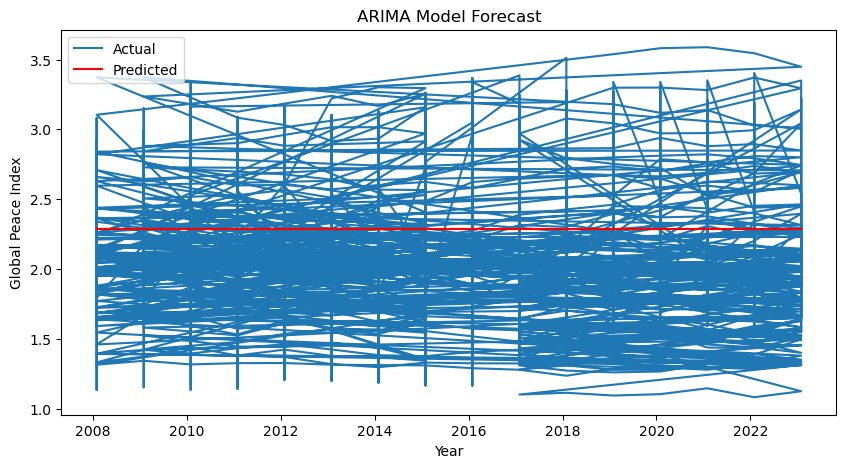

In [16]:
# Visualize the results
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['GPI'], label='Actual')
plt.plot(test.index, predictions, color='red', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Global Peace Index')
plt.legend()
plt.title('ARIMA Model Forecast')
plt.show()